Note: looks like function that should work well in practice are convex non-decreasing function or concave non-increasing

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import src.utils as utils

SEED = 0
np.random.seed(SEED)

Text(0.5, 1.0, 'True Lambdas, N: 200')

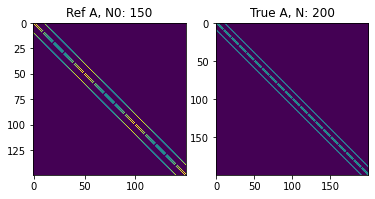

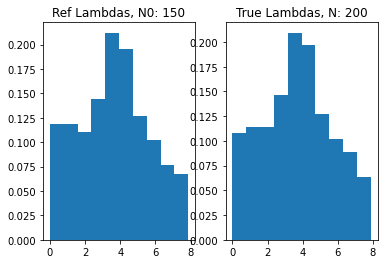

In [2]:
# Ref grap - 150 nodes
n01 = 15
n02 = 10
N0 = n01*n02
A0 = nx.to_numpy_array(nx.grid_2d_graph(n01, n02))
L0 = np.diag(np.sum(A0, 0)) - A0
lambdas0, _ = np.linalg.eigh(L0)

# Target graph - 200 nodes
n1 = 20
n2 = 10
N = n1*n2
A = nx.to_numpy_array(nx.grid_2d_graph(n1, n2))
L = np.diag(np.sum(A, 0)) - A
lambdas, V = np.linalg.eigh(L)
A_norm = np.linalg.norm(A,'fro')**2
lambdas_norm = np.linalg.norm(lambdas)**2

# Plt graphs and spectrum histogram
plt.figure()
plt.subplot(1,2,1)
plt.imshow(A0)
plt.title('Ref A, N0: ' + str(N0))
plt.subplot(1,2,2)
plt.imshow(A)
plt.title('True A, N: ' + str(N))

plt.figure()
plt.subplot(1,2,1)
plt.hist(lambdas0, density=True)
plt.title('Ref Lambdas, N0: ' + str(N0))
plt.subplot(1,2,2)
plt.hist(lambdas, density=True)
plt.title('True Lambdas, N: ' + str(N))

### Test functions in 1D

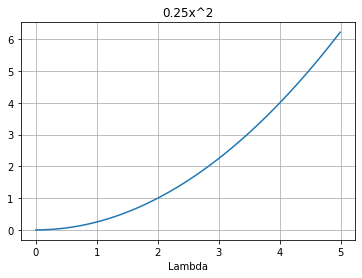

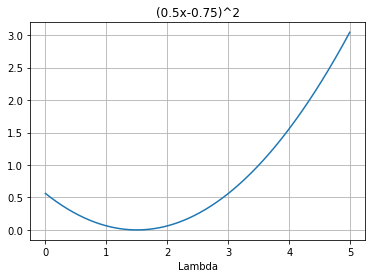

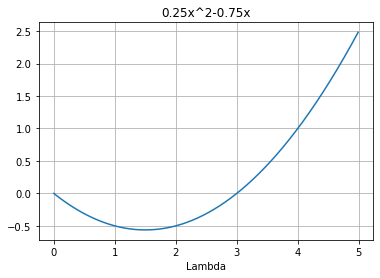

In [6]:
GS = [
    # {'name': 'Tr', 'g': lambda a : a},
    # {'name': 'Sq', 'g': lambda a : a**2},
    # {'name': 'Heat', 'g': lambda a : np.exp(-a)},
    {'name': '0.25x^2', 'g': lambda a : 0.25*a**2},
    {'name': '(0.5x-0.75)^2', 'g': lambda a : (.5*a-.75)**2},
    {'name': '0.25x^2-0.75x', 'g': lambda a : .25*a**2-.75*a},
    #{'name': '(-0.5*2+0.75)x', 'g': lambda a : (-.5*2+.75)*a}, # "Upperbound" with lambda^(t-1) = 1
]

lambdas_range = np.arange(0, 5, 0.01)
for g in GS:
    plt.figure()
    plt.plot(lambdas_range, g['g'](lambdas_range))
    plt.xlabel('Lambda')
    plt.title( g['name'])
    plt.grid(True)

### Feasible set in 2D

In [7]:
# Define constraints

GS = [
    # {'name': 'Tr', 'g': lambda a, b : (a+b)/2},                                # Trace
    # {'name': 'x^2', 'g': lambda a, b : (a**2+b**2)/2},                          # Square
    {'name': '0.25x^2', 'g': lambda a, b : .25*(a**2+b**2)/2},
    {'name': '(x-1.5)^2', 'g': lambda a, b : ((a-1.5)**2+(b-1.5)**2)/2}, 
    {'name': '(0.5x-0.75)^2', 'g': lambda a, b : ((.5*a-.75)**2+(.5*b-.75)**2)/2},  
    {'name': '0.25x^2-0.75x', 'g': lambda a, b : (.25*a**2-.75*a + .25*b**2-.75*b)/2},  # Poly
    # {'name': 'Heat', 'g': lambda a, b : (np.exp(-a)+np.exp(-b))/2},            # Heat
]

In [8]:
# Create grid
# %matplotlib qt
x = np.arange(0,5,.01)
y = np.arange(0,5,.01)
X, Y = np.meshgrid(x,y)

true_lambd = np.array([1, 3])
d1 = .04  # 0.018*c_tr

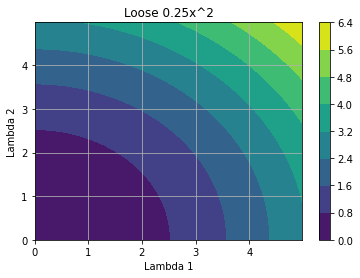

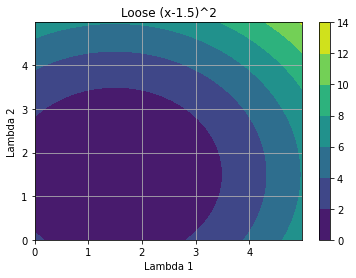

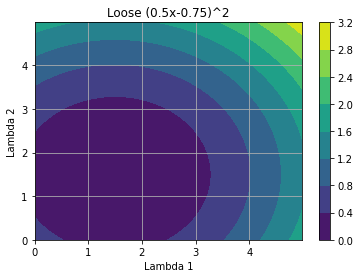

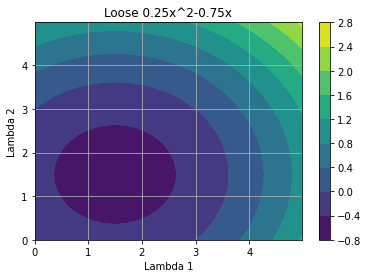

In [9]:
# Contour plots
for i, g in enumerate(GS):
    c = g['g'](true_lambd[0], true_lambd[1])

    plt.figure()
    plt.contourf(X, Y, g['g'](X, Y))
    plt.grid()
    plt.xlabel('Lambda 1')
    plt.ylabel('Lambda 2')
    plt.colorbar()
    plt.title('Loose ' + g['name'])


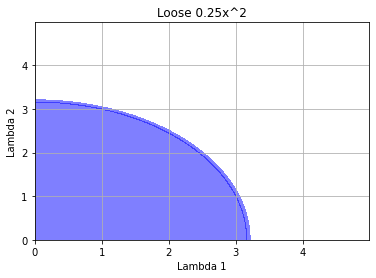

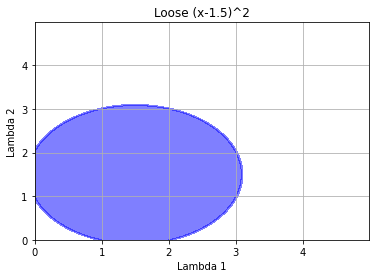

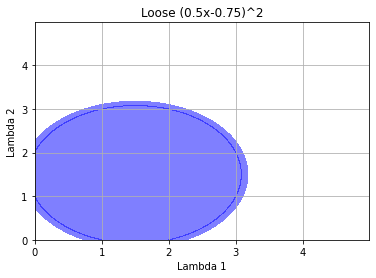

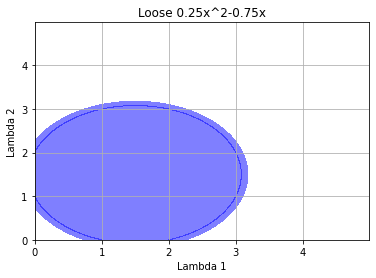

In [10]:
# Loose contraint
for i, g in enumerate(GS):
    c = g['g'](true_lambd[0], true_lambd[1])

    plt.figure()
    plt.contourf(X, Y, g['g'](X, Y), [-np.inf,c, c+d1], alpha=0.5, colors='blue')
    plt.grid()
    plt.xlabel('Lambda 1')
    plt.ylabel('Lambda 2')
    plt.title('Loose ' + g['name'])


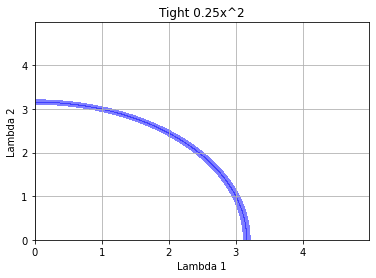

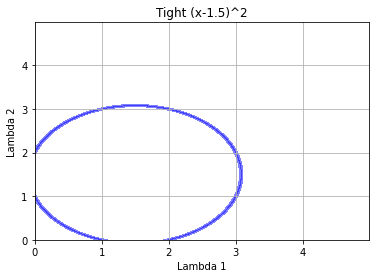

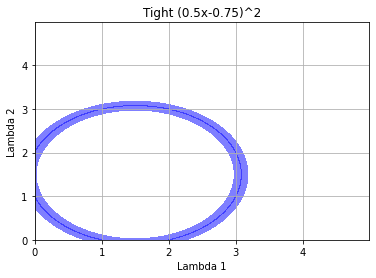

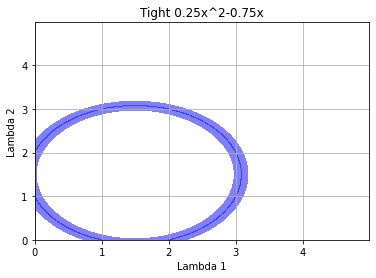

In [11]:
# Tight constraint
for i, g in enumerate(GS):
    c = g['g'](true_lambd[0], true_lambd[1])
    plt.figure()
    plt.contourf(X, Y, g['g'](X, Y), [c-d1,c, c+d1], alpha=0.5, colors='blue')
    plt.grid()
    plt.xlabel('Lambda 1')
    plt.ylabel('Lambda 2')
    plt.title('Tight ' + g['name'])

### Check resulting upperbounds

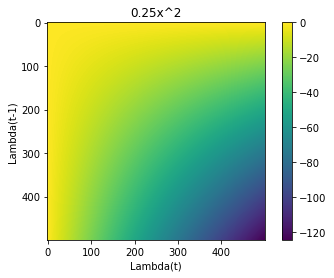

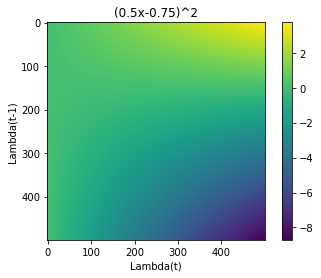

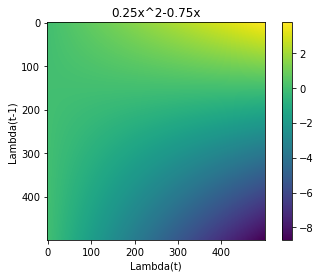

In [16]:
GS = [
    {'name': '0.25x^2', 'g': lambda a, b : -5*b*a},
    {'name': '(0.5x-0.75)^2', 'g': lambda a, b : -(.5*b-.75)*a},
    {'name': '0.25x^2-0.75x', 'g': lambda a, b : -(.5*b-.75)*a},
]

lambdas_range = np.arange(0, 5, 0.01)
lambdas_range2 = np.arange(0, 5, 0.01)
Lambd, Lambd_prev = np.meshgrid(lambdas_range, lambdas_range2)
for g in GS:
    plt.figure()
    plt.imshow(g['g'](Lambd, Lambd_prev))
    plt.colorbar()
    plt.xlabel('Lambda(t)')
    plt.ylabel('Lambda(t-1)')
    plt.title( g['name'])


Text(0.5, 1.0, 'Desired constraints')

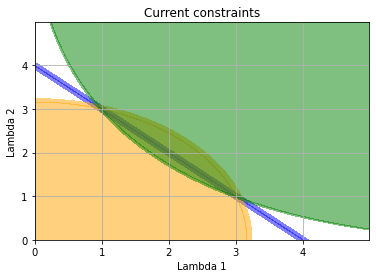

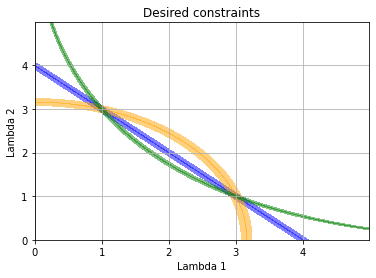

In [9]:
# Draw 2D feasible set
x = np.arange(0,5,.01)
y = np.arange(0,5,.01)
X, Y = np.meshgrid(x,y)

true_lambd = np.array([1, 3])

const_tr = lambda a, b : (a+b)/2 
const_sq = lambda a, b : (a**2+b**2)/2 
const_sq_root = lambda a, b : (np.sqrt(a)+np.sqrt(b))/2 

c_tr = const_tr(true_lambd[0], true_lambd[1])
c_sq = const_sq(true_lambd[0], true_lambd[1])
c_sq_root = const_sq_root(true_lambd[0], true_lambd[1])


d1 = .04  # 0.018*c_tr
d3 = .25  #0.029*c_sq
d2 = .01

plt.figure()
plt.contourf(X, Y, const_tr(X, Y), [c_tr-d1,c_tr, c_tr+d1],
             alpha=0.5, colors='blue')
plt.contourf(X, Y, const_sq(X, Y), [-np.inf, c_sq, c_sq+d3],
             alpha=0.5, colors='orange')
plt.contourf(X, Y, const_sq_root(X, Y), [c_sq_root-d2, c_sq_root, np.inf],
             alpha=0.5, colors='green')
plt.grid()
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.title('Current constraints')


plt.figure()
plt.contourf(X, Y, const_tr(X, Y), [c_tr-d1,c_tr, c_tr+d1],
             alpha=0.5, colors='blue')
plt.contourf(X, Y, const_sq(X, Y), [c_sq-d3, c_sq, c_sq+d3],
             alpha=0.5, colors='orange')
plt.contourf(X, Y, const_sq_root(X, Y), [c_sq_root-d2, c_sq_root, c_sq_root+d2],
             alpha=0.5, colors='green')
plt.grid()
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.title('Desired constraints')